### Computer Vision and Deep Learning 
## Lab 3 - Feature Descriptors
This lab looks into common feature extractors in the vision community. We will look at various filters on static images, and the use of cascade detectors in detection within video.

## Imports <a id="imports"></a>
The following section defines the imports used for the rest of the notebook.

In [2]:
# For ndarray handling:
import numpy as np

# For plotting:
%matplotlib inline 
#notebook
#%matplotlib ipympl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = [11,11]

# For image processing applications
import cv2
import skimage.io
import skimage.feature
import scipy.signal

# For saving images
import skimage


## Get vase.jpg image
We will use a basic image to look at the various filtering operations, but feel free to substitute in your own. Try more complex image structures, do they all work well on noisy images?

In [3]:
image = skimage.io.imread('vase.jpg')

## Generic convolution

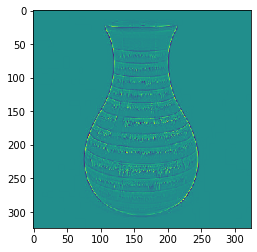

(328, 328, 3)
(324, 324)


In [4]:
# Define the kernel ourselves
LoG_filter = np.asarray([[0,  0,   1,  0,  0],
                         [0,  1,   2,  1,  0],
                         [1,  2, -16,  2,  1],
                         [0,  1,   2,  1,  0],
                         [0,  0,   1,  0,  0]])

# Do the convolution
convolution_result = scipy.signal.convolve2d(skimage.color.rgb2gray(image), LoG_filter, mode='valid')

# Plot the resulting output
plt.figure()
plt.imshow(convolution_result)
plt.show()

# This is interesting. Why?
print(image.shape)
print(convolution_result.shape)

## Prewitt Filter

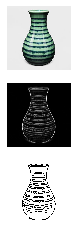

In [5]:
# Filter the image with a Prewitt filter
image_prewitt = skimage.filters.prewitt(skimage.color.rgb2gray(image))

# Plot the original, the filtered image, and the thresholded result
plt.figure()
plt.subplot(3,1,1)
plt.imshow(image)
plt.axis('off')
plt.subplot(3,1,2)
plt.imshow(image_prewitt, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(3,1,3)
plt.imshow(image_prewitt <= skimage.filters.threshold_otsu(image_prewitt), cmap=plt.cm.gray)
plt.axis('off')
plt.show()

## Sobel Filter

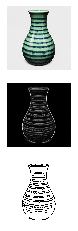

In [6]:
# Filter the image with a Sobel filter
image_sobel = skimage.filters.sobel(skimage.color.rgb2gray(image))

# Plot the original, the filtered image, and the thresholded result
plt.figure()
plt.subplot(3,1,1)
plt.imshow(image)
plt.axis('off')
plt.subplot(3,1,2)
plt.imshow(image_sobel, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(3,1,3)
plt.imshow(image_sobel <= skimage.filters.threshold_otsu(image_sobel), cmap=plt.cm.gray)
plt.axis('off')
plt.show()

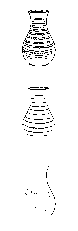

In [7]:
# Try the horizontal and vertical Sobel's seperately
image_sobel = skimage.filters.sobel(skimage.color.rgb2gray(image))
image_sobel_h = skimage.filters.sobel_h(skimage.color.rgb2gray(image))
image_sobel_v = skimage.filters.sobel_v(skimage.color.rgb2gray(image))

# Plot the original, the filtered image, and the thresholded result
plt.figure()
plt.subplot(3,1,1)
plt.imshow(image_sobel <= skimage.filters.threshold_otsu(image_sobel), cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(3,1,2)
plt.imshow(image_sobel_h >= skimage.filters.threshold_otsu(image_sobel_h), cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(3,1,3)
plt.imshow(image_sobel_v <= skimage.filters.threshold_otsu(image_sobel_v), cmap=plt.cm.gray)
plt.axis('off')
plt.show()

## Laplace Filter

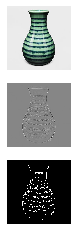

In [8]:
# Filter the image with a Laplace filter
image_laplace = skimage.filters.laplace(skimage.color.rgb2gray(image))

# Plot the original, the filtered image, and the thresholded result
plt.figure()
plt.subplot(3,1,1)
plt.imshow(image)
plt.axis('off')
plt.subplot(3,1,2)
plt.imshow(image_laplace, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(3,1,3)
plt.imshow(image_laplace <= skimage.filters.threshold_otsu(image_laplace), cmap=plt.cm.gray)
plt.axis('off')
plt.show()

# Haar Cascades
The following looks at Haar features and their use in tracking of human faces by use of a cascade classifier. 

In [9]:
# Load video in
cap = cv2.VideoCapture('face.mp4')

# Create Haar cascade detector
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

# Loop over frames in the video and apply cascade detector
for i_frame in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
    
    # Get frame and convert to grayscale
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
       
    # Detect faces and annotate the frame with a bounding box
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        img = cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        # Detect eyes in the face and annotate with bounding boxes
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
    
    # Render the frame
    cv2.imshow('img',frame)
    cv2.waitKey(2)

# Close everything once finished
cap.release()
cv2.destroyAllWindows()

# HoG Features
The utilises the Histogram of Gradients feature extractor on the given image. We can then look at varying the hyperparameters to observe the impact on retained details.

(-0.5, 327.5, 327.5, -0.5)

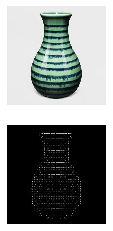

In [10]:
# Extract HoG features and obtain both the vector and the HoG visualization image
hog, hogvis = skimage.feature.hog(image, visualize=True)

# Plot the original and the HoG rose plots
plt.figure()
plt.subplot(2,1,1)
plt.imshow(image)
plt.axis('off')
plt.subplot(2,1,2)
plt.imshow(hogvis, cmap=plt.cm.gray)
plt.axis('off')

(-0.5, 327.5, 327.5, -0.5)

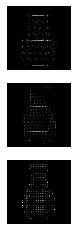

In [11]:
hog, hogvis = skimage.feature.hog(image, pixels_per_cell=(32, 32), visualize=True)
hog, hogvis2 = skimage.feature.hog(image, pixels_per_cell=(16, 16), visualize=True)
hog, hogvis3 = skimage.feature.hog(image, pixels_per_cell=(2, 2), visualize=True)

# Plot the various HoG results with differing cell sizes
plt.figure()
plt.subplot(3,1,1)
plt.imshow(hogvis, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(3,1,2)
plt.imshow(hogvis2, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(3,1,3)
plt.imshow(hogvis3, cmap=plt.cm.gray)
plt.axis('off')